## <h1 align="center">Customer Retention And Churn Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('telco.csv')
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


## It provides a quick summary of the dataset used in this project.
## Total number of rows and columns  

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

## It replace blank spaces in the **Total Charges** column with zeros.  

In [3]:
df["Total Charges"]=df["Total Charges"].replace(" ","0")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [5]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [6]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


## It counts how many duplicate customer IDs exist in the dataset.  

In [7]:
df["Customer ID"].duplicated().sum()

np.int64(0)

## shows the number of customers in each state using Seaborn.

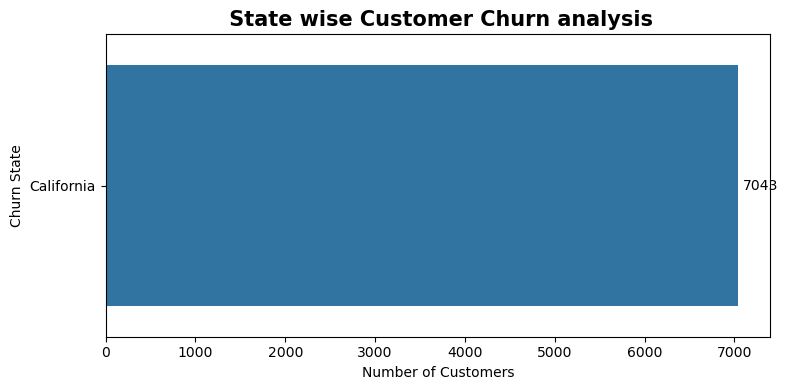

In [8]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    y="State",
    data=df,
    order=df["State"].value_counts().index,
    hue="State",
    legend=False,
    # palette="viridis"
)
ax.bar_label(ax.containers[0], fontsize=10, padding=3)
plt.title(" State wise Customer Churn analysis", fontsize=15, fontweight="bold")
plt.xlabel("Number of Customers")
plt.ylabel("Churn State")
plt.tight_layout()
plt.show()

## The chart helps identify which cities have the highest churn rate, so the company can focus retention efforts there.

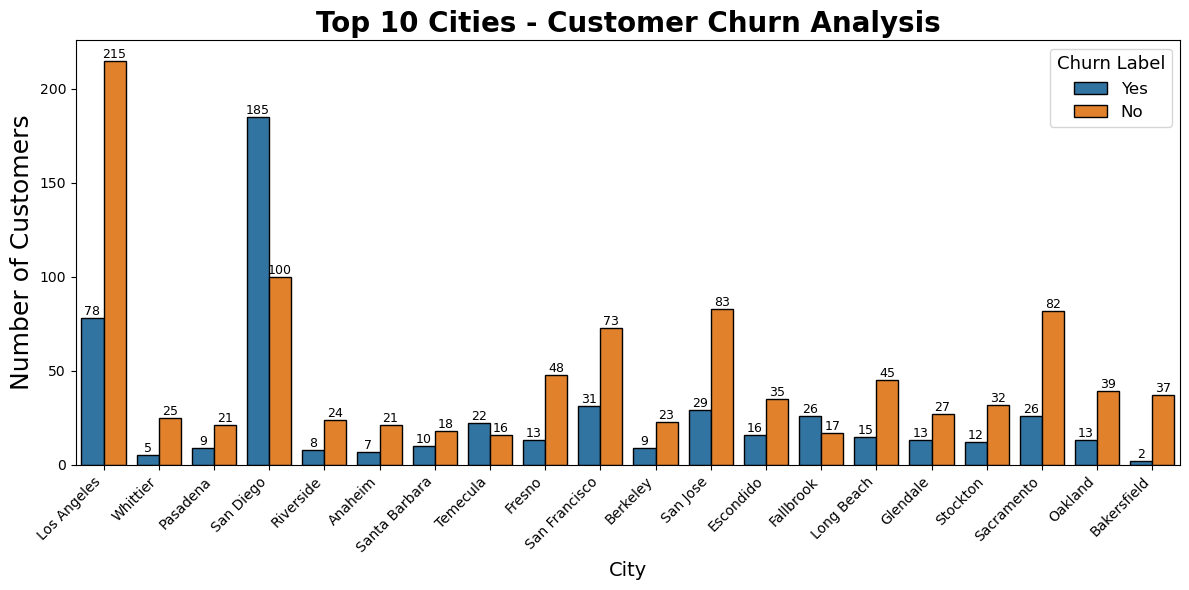

In [9]:
top_cities = df['City'].value_counts().head(20).index
df_top = df[df['City'].isin(top_cities)]
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x="City",
    data=df_top,
    hue="Churn Label",
    edgecolor="black"
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9)
plt.title("Top 10 Cities - Customer Churn Analysis", fontsize=20, fontweight='bold')
plt.xlabel("City", fontsize=14)
plt.ylabel("Number of Customers", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Churn Label", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()

## It shows how many customers churned vs how many stayed.
## If the “No” bar is much higher, it means most customers are retained.
## If the “Yes” bar is large, it indicates a churn problem that needs attention.

<function matplotlib.pyplot.show(close=None, block=None)>

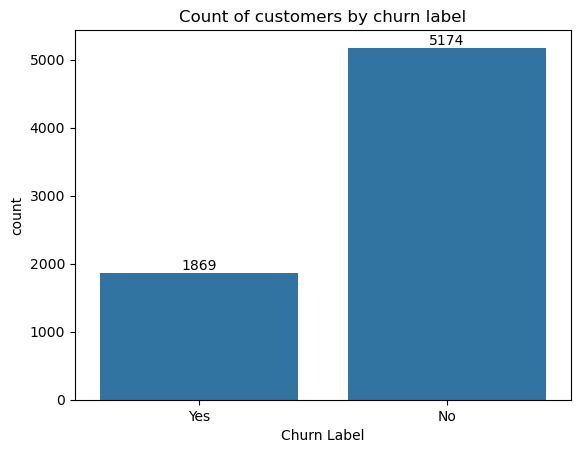

In [10]:
ax=sns.countplot(x='Churn Label',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn label")
plt.show

## It highlights the percentage of customers who left (churned) versus those who remained loyal.

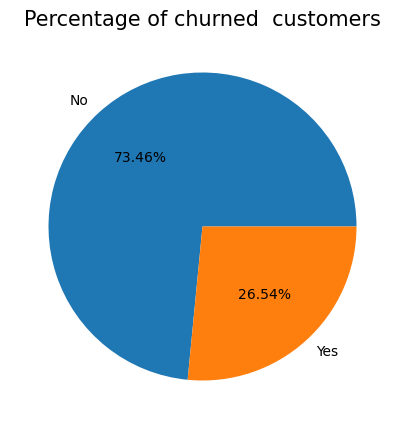

In [11]:
plt.figure(figsize=(5,5))
gb=df.groupby("Churn Label").agg({'Churn Label':"count"})
plt.pie(gb['Churn Label'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of churned  customers",fontsize=15)
plt.show()

## It show that most customers churned due to service issues and better competitor offers. Understanding these reasons helps improve customer retention strategies.

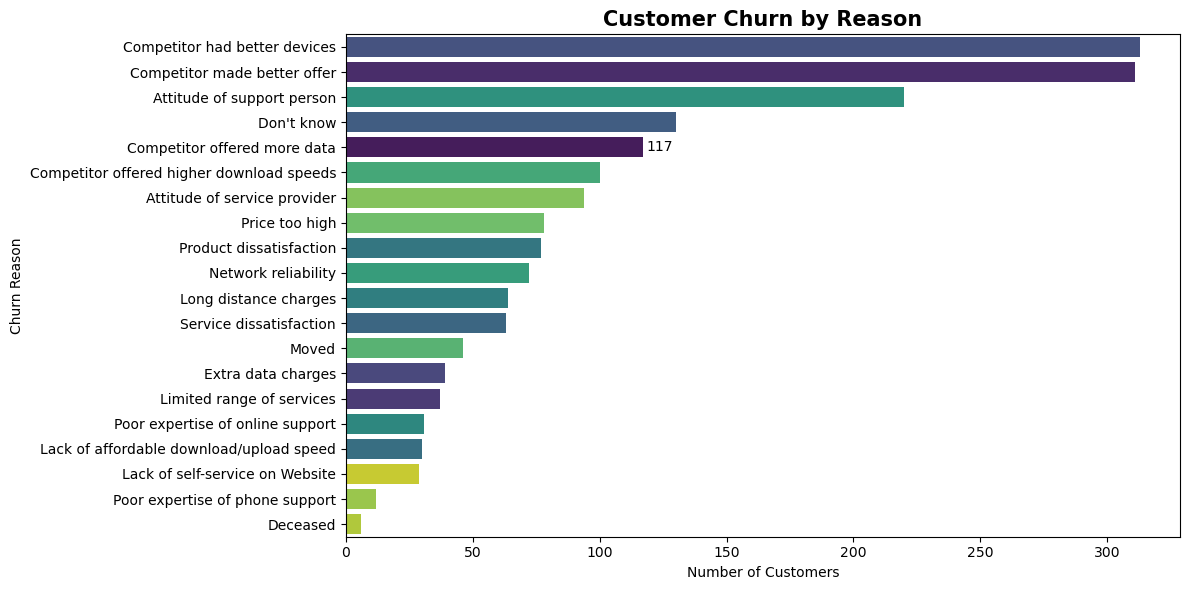

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    y="Churn Reason",
    data=df,
    order=df["Churn Reason"].value_counts().index,
    hue="Churn Reason",
    legend=False,
    palette="viridis"
)
ax.bar_label(ax.containers[0], fontsize=10, padding=3)
plt.title("Customer Churn by Reason", fontsize=15, fontweight="bold")
plt.xlabel("Number of Customers")
plt.ylabel("Churn Reason")
plt.tight_layout()
plt.show()

# from the given pie chart we can conclude that 26.54% of our customers have churned out
# now lets explore reason behind it

## The number of female and male customers is nearly similar, but female gender may show a higher churn rate depending on our dataset.

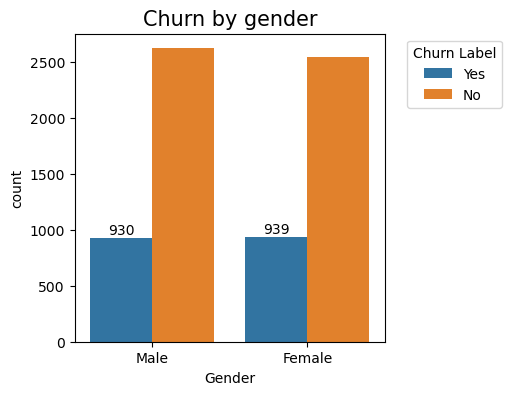

In [13]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Gender",data=df,hue="Churn Label")
ax.bar_label(ax.containers[0])
plt.legend(title='Churn Label', bbox_to_anchor=(1.05, 1))
plt.title("Churn by gender",fontsize=15)
plt.show()

## This suggests that **senior customers are more likely to discontinue the service**, possibly due to limited usage, higher pricing sensitivity, or difficulty with technology.  

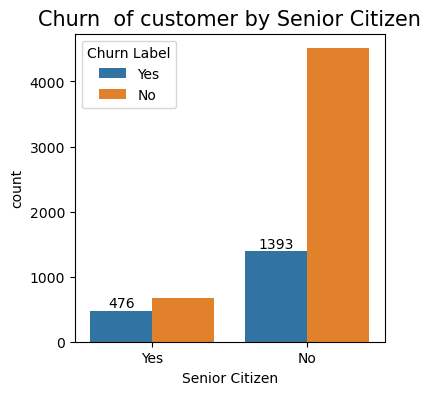

In [14]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Senior Citizen",data=df,hue="Churn Label")
ax.bar_label(ax.containers[0])
plt.title("Churn  of customer by Senior Citizen",fontsize=15)
plt.show()

## It show that senior citizens have a higher churn percentage than non-senior customers.

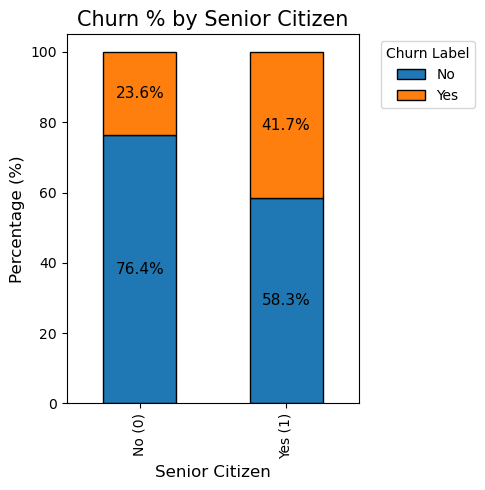

In [21]:
df = pd.read_csv("telco.csv")
ct = pd.crosstab(df['Senior Citizen'], df['Churn Label'], normalize='index') * 100
ct = ct[['No', 'Yes']]
ax = ct.plot(
    kind='bar',
    stacked=True,
    figsize=(5,5),
    edgecolor='black'
)
for i, row in enumerate(ct.values):
    cumulative = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(
                i,
                cumulative + val/2,
                f'{val:.1f}%',
                ha='center',
                va='center',
                fontsize=11,
                color='black'
            )
        cumulative += val
plt.title("Churn % by Senior Citizen", fontsize=15)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks([0,1], ["No (0)", "Yes (1)"])
plt.legend(title="Churn Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Customers with shorter tenure (few months) have a higher churn rate.

## As tenure increases, the number of churned customers decreases.

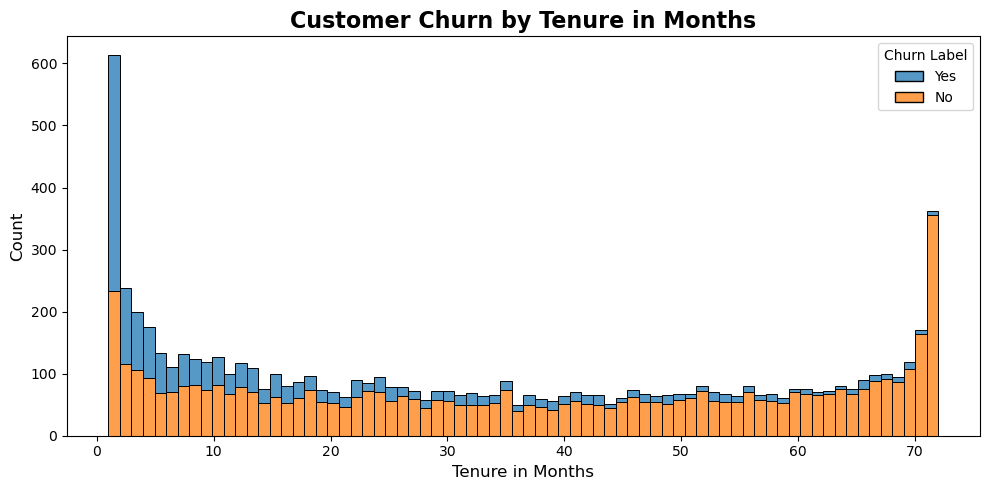

In [16]:
df['Churn Label'] = df['Churn Label'].astype(str).str.strip().str.title()
plt.figure(figsize=(10, 5))
ax = sns.histplot(
    data=df,
    x='Tenure in Months',
    hue='Churn Label',
    multiple='stack',
    bins=72,
    edgecolor='black'
)
handles, labels = ax.get_legend_handles_labels()
plt.title("Customer Churn by Tenure in Months", fontsize=16, fontweight='bold')
plt.xlabel("Tenure in Months", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

# people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

## It show that most customers who churn are on month-to-month contracts, while those with yearly contracts are more stable. Long-term contracts help reduce churn and improve customer retention.

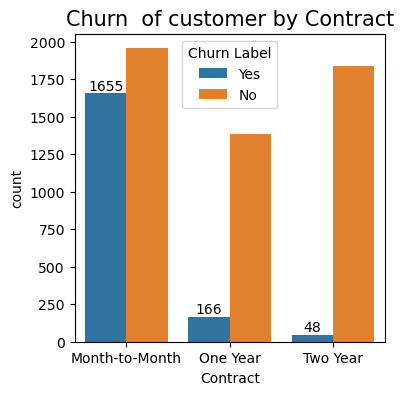

In [17]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn Label")
ax.bar_label(ax.containers[0])
plt.title("Churn  of customer by Contract",fontsize=15)
plt.show()

# people who have month to month contract likely to churn then from those who have 1 or 2 years of contract

In [18]:
df.columns.values

array(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Country',
       'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue',
       'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype=object)

## Each subplot shows how a particular service or plan affects customer churn.
## Customers without offers, phone service, multiple lines, internet service, or add-on protections (like online security, backup, or device protection) tend to churn more.
## Among internet users, those with DSL or cable are more likely to churn compared to fiber optic users.
## Higher average monthly long-distance charges don’t strongly prevent churn, but lower charges still see some churn.
## In short: lack of services, lower-tier internet types, and minimal add-on protections are associated with higher churn.

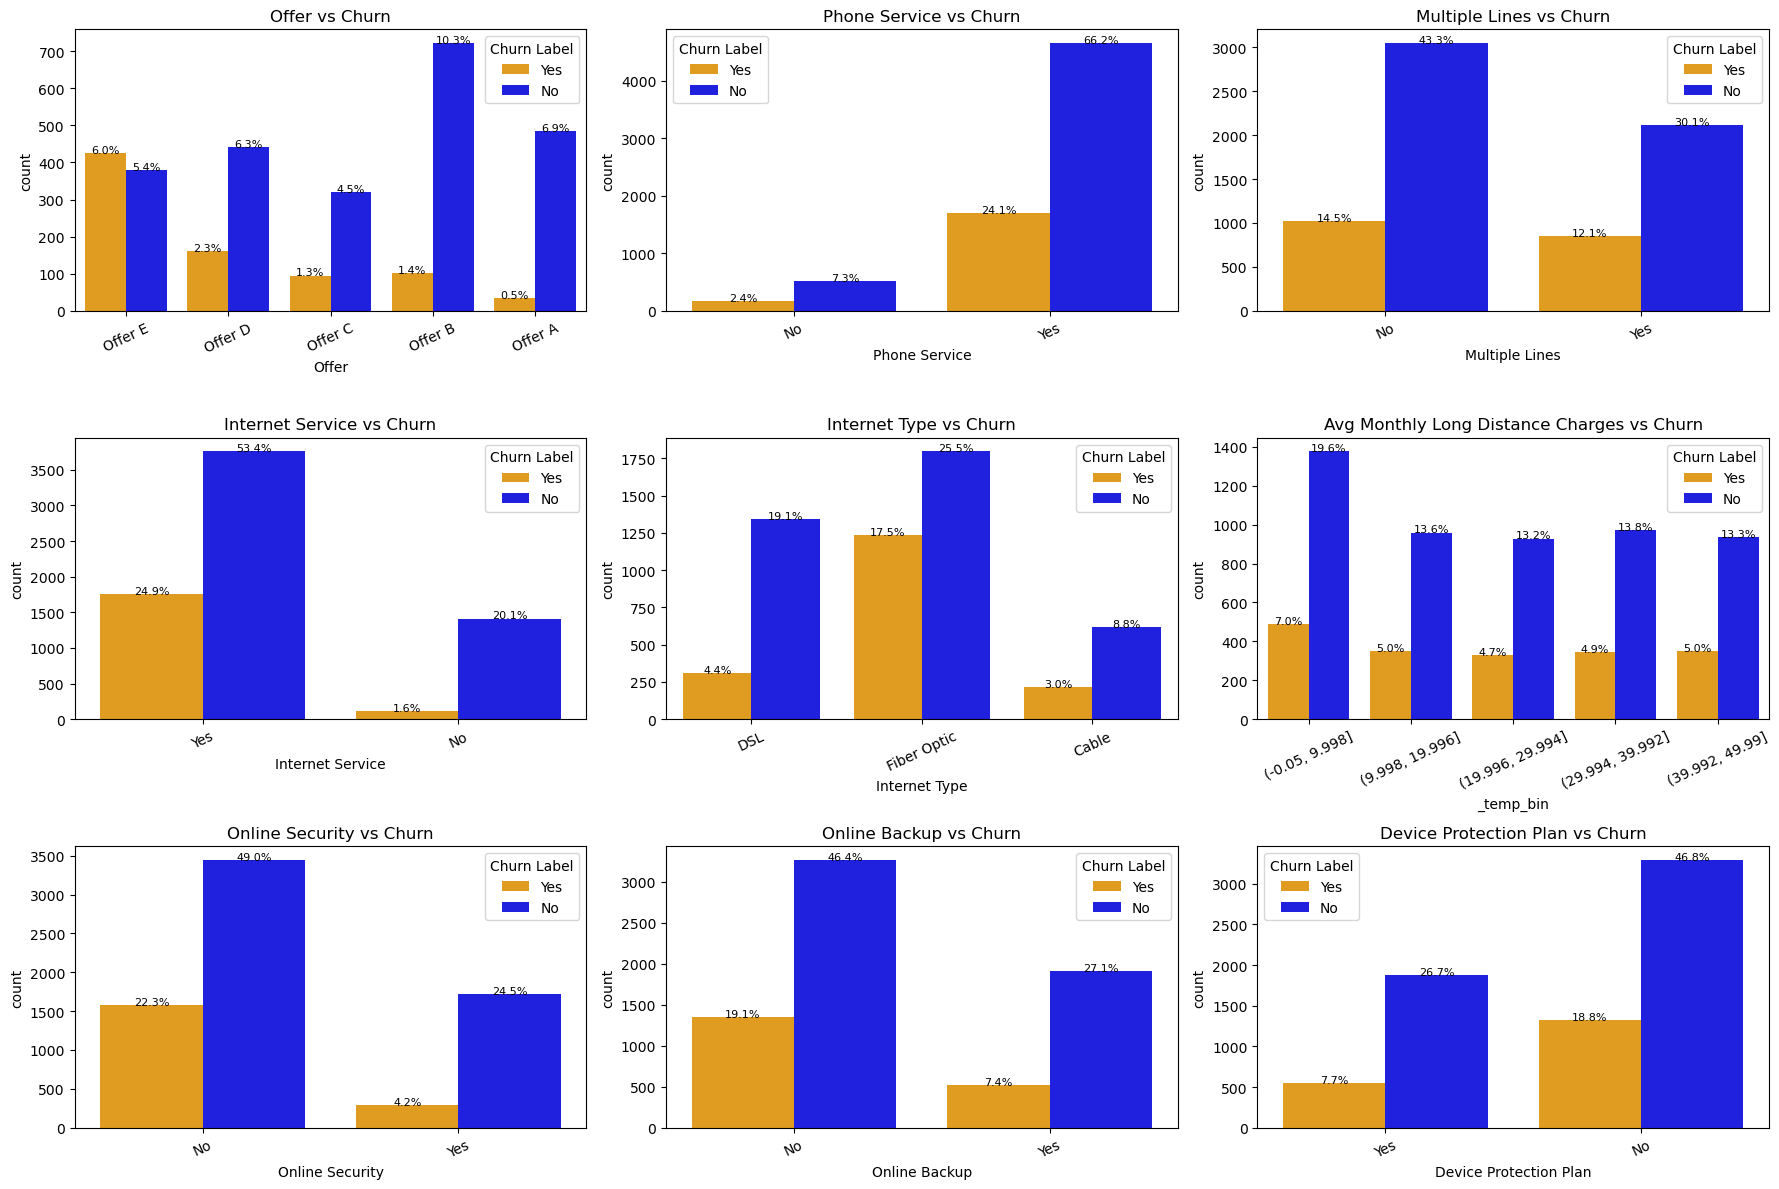

In [19]:
cols = [
    'Offer', 'Phone Service', 'Multiple Lines',
    'Internet Service', 'Internet Type',
    'Avg Monthly Long Distance Charges',
    'Online Security', 'Online Backup', 'Device Protection Plan'
]
plt.figure(figsize=(18, 12))
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols 

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    if pd.api.types.is_numeric_dtype(df[col]):
        df['_temp_bin'] = pd.cut(df[col], bins=5)
        x_col = '_temp_bin'
    else:
        x_col = col
    sns.countplot(
        data=df, 
        x=x_col, 
        hue='Churn Label',
        palette={'Yes': 'orange', 'No': 'blue'}
    )
    plt.title(f'{col} vs Churn', fontsize=12)
    plt.xticks(rotation=25)
    total = len(df)
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.text(
                p.get_x() + p.get_width()/2,
                height + 0.5,
                f'{100 * height / total:.1f}%',
                ha='center', fontsize=8
            )
    if '_temp_bin' in df.columns:
        df.drop(columns=['_temp_bin'], inplace=True)
plt.tight_layout()
plt.show()

## # Customer is likely to churn when he is using electronic check as a payment

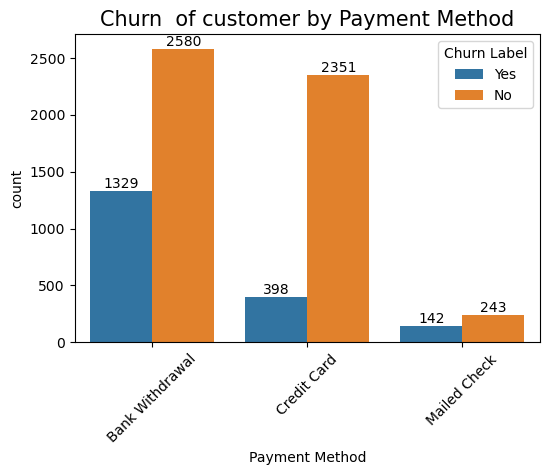

In [20]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="Payment Method",data=df,hue="Churn Label")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churn  of customer by Payment Method",fontsize=15)
plt.show()

# By identifying the key reasons for churn, the company can take early actions to retain customers and improve overall business growth.